In [1]:
import  time
#输出现有时间
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

2025-06-29 21:42:10


### 测试自定义的KNN算法
### 该代码实现了一个简单的KNN算法，使用MNIST数据集进行测试。它包括数据集的加载、预处理、KNN算法的实现以及模型的训练和预测。最后输出不同k值下的准确率。

k=1, accuracy=0.8700
k=2, accuracy=0.8450
k=3, accuracy=0.8300
k=4, accuracy=0.8250
k=5, accuracy=0.8300
k=6, accuracy=0.8300
k=7, accuracy=0.8250
k=8, accuracy=0.8250
k=9, accuracy=0.8100
k=10, accuracy=0.7950


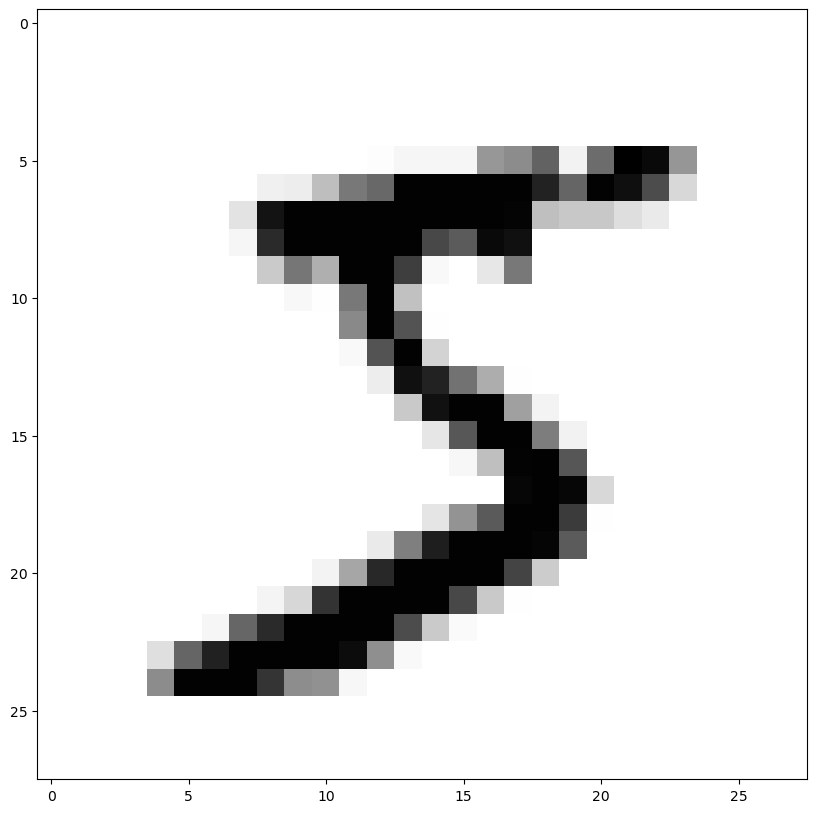

In [11]:
# 导入minst数据集
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
X=X[:1000]  # 只取前1000
y=y[:1000]  # 只取前1000
#import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os

#数据集可视化
data=np.reshape(np.array(X.iloc[0],dtype=int),[28,28])
plt.figure(figsize=(10,10))
plt.imshow(data, cmap='Greys')

#划分数据集
radio=0.8
split=int(len(y)*radio)

np.random.seed(0)
idx=np.random.permutation(np.arange(len(y)))
X_train, X_test = X.iloc[idx[:split]], X.iloc[idx[split:]]
y_train, y_test = y.iloc[idx[:split]], y.iloc[idx[split:]]


#define my knn algorithm
class knn:
    def __init__(self,k,label_num):
        self.k=k
        self.label_num=label_num
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def get_knn_indices(self,x):
        #计算欧氏距离
        distances=np.linalg.norm(self.x_train-x,axis=1)
        #获取距离最小的k个索引
        knn_indices=np.argsort(distances)[:self.k]
        return knn_indices
    def get_label(self,x):
        #获取k个最近邻的标签
        knn_indices=self.get_knn_indices(x)
        knn_labels=self.y_train.iloc[knn_indices]
        #统计每个标签出现的次数
        label_counts=np.bincount(knn_labels.astype(int), minlength=self.label_num)
        #返回出现次数最多的标签
        return np.argmax(label_counts)
    def predict(self,x_test):
        #对测试集进行预测
        predictions=[self.get_label(x) for x in x_test.values]
        return np.array(predictions)
for k in range(1,11):
    #创建knn对象
    my_knn=knn(k,10)
    #训练模型
    my_knn.fit(X_train,y_train)
    #预测
    y_pred=my_knn.predict(X_test)
    #计算准确率
    accuracy=np.mean(y_pred==y_test.astype(int))
    print(f'k={k}, accuracy={accuracy:.4f}')

